In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from functools import partial

# from weather.helpers.figures import get_todays_save_path
from weather.peak_fit.main import peak_temp_fit, get_data_to_fit, fit_func, prepare_func, init_df, peak_temp_prepare
from scipy.optimize import curve_fit
import numpy as np

In [12]:
peak_temp_prepare(1)(np.array([-2, -1, 0, 1, 2]), 1)

array([0.6, 0.9, 1. , 0.9, 0.6])

In [3]:
mdf = init_df()
mdf


datetime,Dry Bulb Temperature
datetime[μs],f64
2020-06-01 00:00:00,16.0
2020-06-01 01:00:00,15.8
2020-06-01 02:00:00,15.5
2020-06-01 03:00:00,15.3
2020-06-01 04:00:00,15.1
…,…
2020-06-29 19:00:00,19.9
2020-06-29 20:00:00,19.2
2020-06-29 21:00:00,18.8


[-0.1476101] [[0.00561334]]


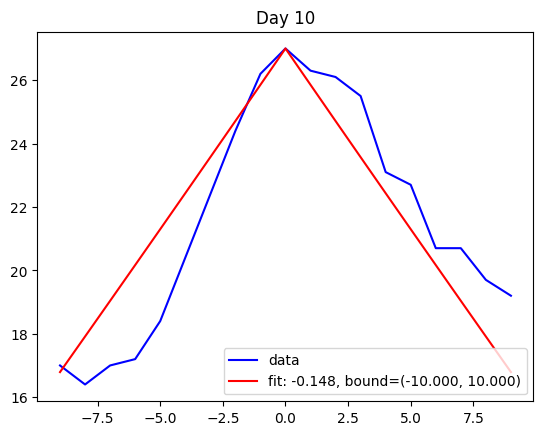

In [74]:
fit_func(mdf, 10, bounds=[-10, 10])

[-0.28591658] [[0.00080098]]


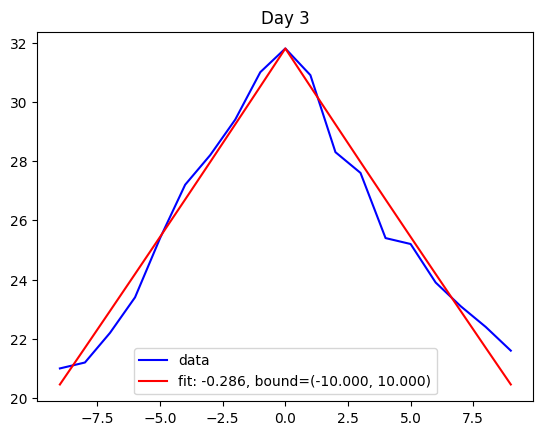

In [69]:
fit_func(mdf, 3, bounds=[-10, 10])

In [4]:
# from weather.peak_fit.main import get_max_temp_and_time
# day=1
# extent=9

# peak_hour, peak_temp = get_max_temp_and_time(mdf, day)
# hours, xs, ys = get_data_to_fit(mdf, extent, peak_hour, day)

In [13]:
f, x, y = prepare_func(mdf, 1)
f

<function weather.peak_fit.main.peak_temp_prepare.<locals>.<lambda>(x, k)>

In [14]:
curve_fit(f, xdata=x, ydata=y, p0=1)

(array([1.12593752]), array([[0.01154668]]))

In [ ]:
Schema = pl.Schema([('datetime', pl.Datetime(time_unit='us', time_zone=None)),
        ('Dry Bulb Temperature', pl.Float64)])

Schema.validate()

In [21]:
day = 1
day_df = june.with_columns(day=pl.col("datetime").dt.day()).filter(pl.col("day") == day)
res = day_df[day_df["Dry Bulb Temperature"].arg_max()].select(pl.col("datetime").dt.hour().alias("hour"), pl.col("Dry Bulb Temperature")).to_dicts()[0]

res


{'hour': 13, 'Dry Bulb Temperature': 24.0}

In [24]:
hour, temp = res.values()
hour

13

In [ ]:
# find the max temp on a day...


In [297]:
## assume max temp is in the middle.. 
def find_max_temp(x:np.array,y:np.array):
    mid_ix = np.where(x ==0)
    max_temp = y[mid_ix]
    return max_temp

In [326]:
def create_data(day=1, peak_hour=13, extent=3):
    hours, x, y = get_data_to_fit(june, extent=extent, peak_hour=peak_hour, day=day)
    max_temp = find_max_temp(x,y)
    def create_plot_df():
        return pl.DataFrame({"hours": hours, "x": x, "y_true": y})

    fits = pl.DataFrame(
        {
            f"y_fit_{i}": peak_temp_fit(i, max_temp, x)
            for i in np.arange(1, 10, step=1)
        }
    )
    return pl.concat([create_plot_df(), fits], how="horizontal")


data = create_data(day=1)
data

hours,x,y_true,y_fit_1,y_fit_2,y_fit_3,y_fit_4,y_fit_5,y_fit_6,y_fit_7,y_fit_8,y_fit_9
datetime[μs],i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-07-01 10:00:00,-3,21.2,23.1,22.2,21.3,20.4,19.5,18.6,17.7,16.8,15.9
2020-07-01 11:00:00,-2,22.2,23.6,23.2,22.8,22.4,22.0,21.6,21.2,20.8,20.4
2020-07-01 12:00:00,-1,23.2,23.9,23.8,23.7,23.6,23.5,23.4,23.3,23.2,23.1
2020-07-01 13:00:00,0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
2020-07-01 14:00:00,1,23.8,23.9,23.8,23.7,23.6,23.5,23.4,23.3,23.2,23.1
2020-07-01 15:00:00,2,23.2,23.6,23.2,22.8,22.4,22.0,21.6,21.2,20.8,20.4
2020-07-01 16:00:00,3,20.8,23.1,22.2,21.3,20.4,19.5,18.6,17.7,16.8,15.9


In [299]:
np.arange(0.9, 1.01, step=0.02)

array([0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [327]:
data = create_data(day=1, extent=5)
base = alt.Chart(data)
true = base.mark_line().encode(
    x="hours:T",
    y=alt.Y("y_true:Q").scale(zero=False),
    order="t:Q",
    color=alt.value("black"),
)

flipped = data.unpivot(index="hours", on=cs.starts_with("y_fit"))


fits = (
    alt.Chart(flipped)
    .mark_line()
    .encode(
        x="hours:T",
        y="value:Q",
        color="variable:N",
        strokeDash=alt.value([2,1])

    )
)

true + fits

alt.LayerChart(...)

In [334]:
data = create_data(day=5, peak_hour=14, extent=2)
base = alt.Chart(data)
true = base.mark_line().encode(
    x="hours:T",
    y=alt.Y("y_true:Q").scale(zero=False),
    order="t:Q",
    color=alt.value("black"),
)

flipped = data.unpivot(index="hours", on=cs.starts_with("y_fit"))


fits = (
    alt.Chart(flipped)
    .mark_line()
    .encode(
        x="hours:T",
        y="value:Q",
        color="variable:N",
        strokeDash=alt.value([2,1])

    )
)

true + fits

alt.LayerChart(...)